# #Determines



#### Features

- timestamp - timestamp field for grouping the data
- cnt - the count of a new bike shares
- t1 - real temperature in C
- t2 - temperature in C “feels like”
- hum - humidity in percentage
- wind_speed - wind speed in km/h
- weather_code - category of the weather
- is_holiday - boolean field - 1 holiday / 0 non holiday
- is_weekend - boolean field - 1 if the day is weekend
- season - category field meteorological seasons: 0-spring ; 1-summer; 2-fall; 3-winter.

**"weather_code" category description:**
* 1 = Clear ; mostly clear but have some values with haze/fog/patches of fog/ fog in vicinity 
* 2 = scattered clouds / few clouds 
* 3 = Broken clouds 
* 4 = Cloudy 
* 7 = Rain/ light Rain shower/ Light rain 
* 10 = rain with thunderstorm 
* 26 = snowfall 
* 94 = Freezing Fog
---

Initially, the task of discovering data will be waiting for you as always. Recognize features, detect missing values, outliers etc.  Review the data from various angles in different time breakdowns. For example, visualize the distribution of bike shares by day of the week. With this graph, you will be able to easily observe and make inferences how people's behavior changes daily. Likewise, you can make hourly, monthly, seasonally etc. analyzes. In addition, you can analyze correlation of variables with a heatmap.  


# Tasks


### 1.Import libraries

In [2]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from pandas.plotting import register_matplotlib_converters
from pylab import rcParams
sns.set_style("darkgrid")

import warnings
warnings.filterwarnings("ignore")
plt.rcParams["figure.figsize"] = (12, 8)

### 2.Read dataset

In [3]:
df = pd.read_csv("store_sharing.csv")
df

,timestamp,cnt,t1,t2,hum,wind_speed,weather_code,is_holiday,is_weekend,season
0,2015-01-04 00:00:00,182,3.0,2.0,93.0,6.0,3.0,0.0,1.0,3.0
1,2015-01-04 01:00:00,138,3.0,2.5,93.0,5.0,1.0,0.0,1.0,3.0
2,2015-01-04 02:00:00,134,2.5,2.5,96.5,0.0,1.0,0.0,1.0,3.0
3,2015-01-04 03:00:00,72,2.0,2.0,100.0,0.0,1.0,0.0,1.0,3.0
4,2015-01-04 04:00:00,47,2.0,0.0,93.0,6.5,1.0,0.0,1.0,3.0
...,...,...,...,...,...,...,...,...,...,...
17409,2017-01-03 19:00:00,1042,5.0,1.0,81.0,19.0,3.0,0.0,0.0,3.0
17410,2017-01-03 20:00:00,541,5.0,1.0,81.0,21.0,4.0,0.0,0.0,3.0
17411,2017-01-03 21:00:00,337,5.5,1.5,78.5,24.0,4.0,0.0,0.0,3.0
17412,2017-01-03 22:00:00,224,5.5,1.5,76.0,23.0,4.0,0.0,0.0,3.0


### 3.Check missing values and if there are any dublicate rows or not.

In [4]:
df.duplicated(keep=False).value_counts()

False    17414
dtype: int64

In [5]:
df.isnull().sum()

timestamp       0
cnt             0
t1              0
t2              0
hum             0
wind_speed      0
weather_code    0
is_holiday      0
is_weekend      0
season          0
dtype: int64

### 4.Plot the distribution of various discrete features on (Season, haliday, weekend and weathercode)

<AxesSubplot:xlabel='season', ylabel='count'>

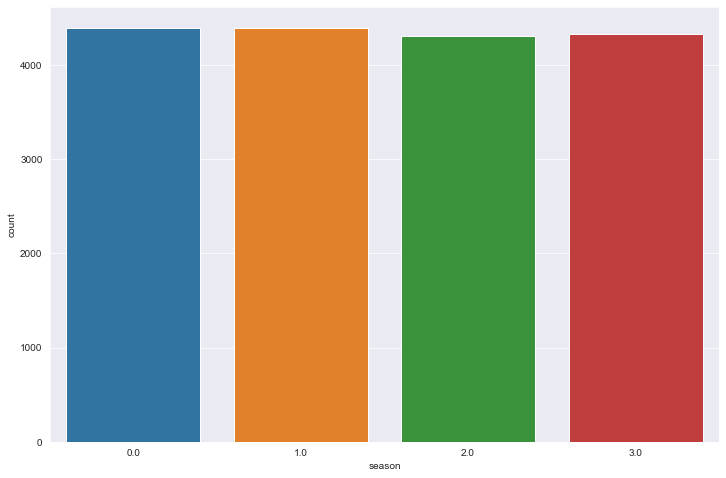

In [6]:
sns.countplot(x="season",data=df)

<AxesSubplot:xlabel='is_holiday', ylabel='count'>

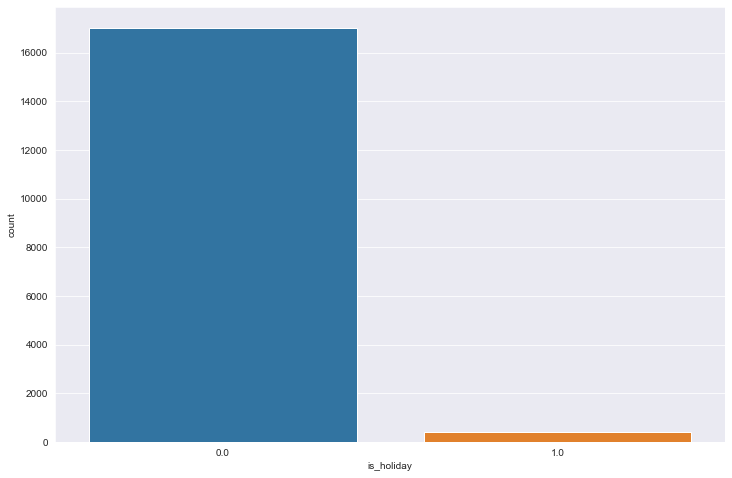

In [7]:
# is_holiday
sns.countplot(x="is_holiday",data=df)

<AxesSubplot:xlabel='is_weekend', ylabel='count'>

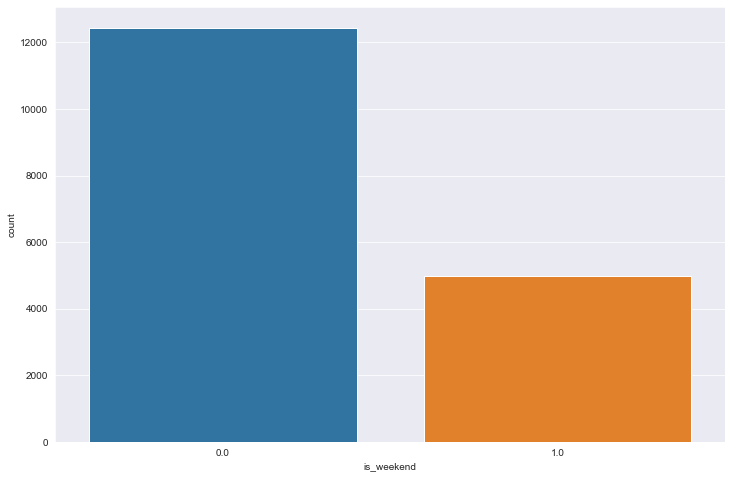

In [7]:
# is_weekend
sns.countplot(x="is_weekend",data=df)

<AxesSubplot:xlabel='weather_code', ylabel='count'>

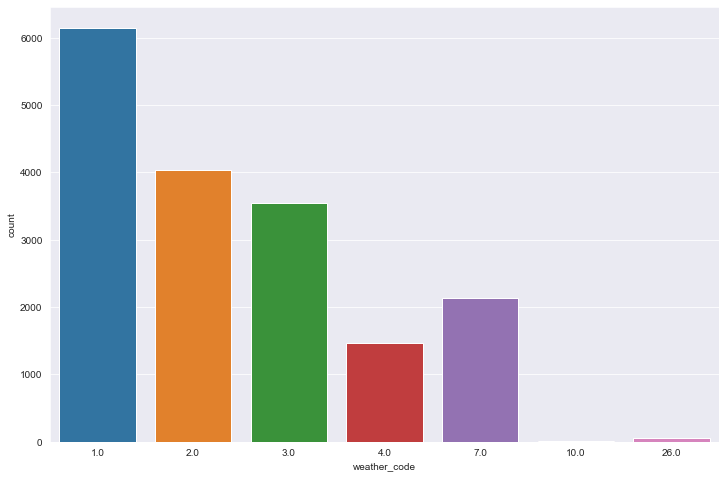

In [8]:
# weather_code
sns.countplot(x="weather_code",data=df)

### 5.Look at the data type of each variable, transform `timestamp` in type, and set it as index.

In [16]:
df=df.set_index("timestamp")
df

,cnt,t1,t2,hum,wind_speed,weather_code,is_holiday,is_weekend,season,year,month,day_of_month,day_of_week,hour,year_month
timestamp,,,,,,,,,,,,,,,
2015-01-04 00:00:00,182,3.0,2.0,93.0,6.0,3.0,0.0,1.0,3.0,2015,1,4,6,0,2015-01
2015-01-04 01:00:00,138,3.0,2.5,93.0,5.0,1.0,0.0,1.0,3.0,2015,1,4,6,1,2015-01
2015-01-04 02:00:00,134,2.5,2.5,96.5,0.0,1.0,0.0,1.0,3.0,2015,1,4,6,2,2015-01
2015-01-04 03:00:00,72,2.0,2.0,100.0,0.0,1.0,0.0,1.0,3.0,2015,1,4,6,3,2015-01
2015-01-04 04:00:00,47,2.0,0.0,93.0,6.5,1.0,0.0,1.0,3.0,2015,1,4,6,4,2015-01
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2017-01-03 19:00:00,1042,5.0,1.0,81.0,19.0,3.0,0.0,0.0,3.0,2017,1,3,1,19,2017-01
2017-01-03 20:00:00,541,5.0,1.0,81.0,21.0,4.0,0.0,0.0,3.0,2017,1,3,1,20,2017-01
2017-01-03 21:00:00,337,5.5,1.5,78.5,24.0,4.0,0.0,0.0,3.0,2017,1,3,1,21,2017-01


- Tam 2 yillik bir timestamp var. `year, month, day_of_month, day_of_week, hour` bilgilerini alarak feature engineering yapalim

### 6.Make feature engineering. Extract new columns (day of the week, day of the month, hour, month, season, year etc.)

you can use strftime('%Y-%m') for year_mount

In [8]:
df["timestamp"] = pd.to_datetime(df["timestamp"])

In [9]:
df["year"]=df["timestamp"].dt.year

In [10]:
df["month"]=df["timestamp"].dt.month

In [11]:
df["day_of_month"]=df["timestamp"].dt.day

In [12]:
df["day_of_week"]=df["timestamp"].dt.dayofweek

In [13]:
df["hour"]=df["timestamp"].dt.hour

In [14]:
df["year_month"]=df["timestamp"].dt.strftime('%Y-%m')

In [15]:
df.head()

,timestamp,cnt,t1,t2,hum,wind_speed,weather_code,is_holiday,is_weekend,season,year,month,day_of_month,day_of_week,hour,year_month
0,2015-01-04 00:00:00,182,3.0,2.0,93.0,6.0,3.0,0.0,1.0,3.0,2015,1,4,6,0,2015-01
1,2015-01-04 01:00:00,138,3.0,2.5,93.0,5.0,1.0,0.0,1.0,3.0,2015,1,4,6,1,2015-01
2,2015-01-04 02:00:00,134,2.5,2.5,96.5,0.0,1.0,0.0,1.0,3.0,2015,1,4,6,2,2015-01
3,2015-01-04 03:00:00,72,2.0,2.0,100.0,0.0,1.0,0.0,1.0,3.0,2015,1,4,6,3,2015-01
4,2015-01-04 04:00:00,47,2.0,0.0,93.0,6.5,1.0,0.0,1.0,3.0,2015,1,4,6,4,2015-01


### 7.Visualize the correlation with a heatmap

<AxesSubplot:>

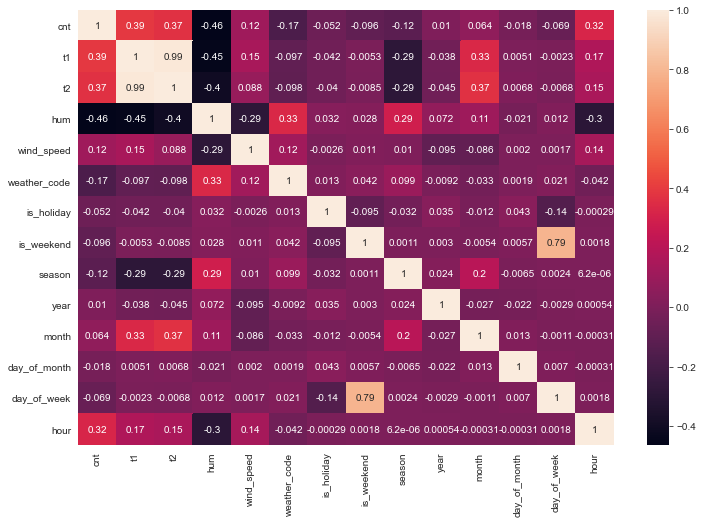

In [30]:
# for all variables 
sns.heatmap(df.corr(),annot=True)

<AxesSubplot:>

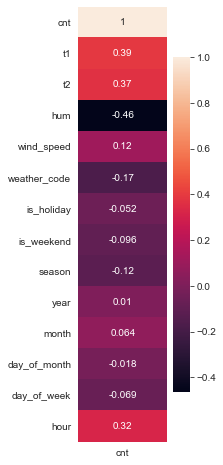

In [32]:
# for the target variable
plt.figure(figsize=(2,8))
sns.heatmap(df.corr().loc[:,["cnt"]],annot=True)

### 8. Visualize the correlation of the target variable and the other features with barplot

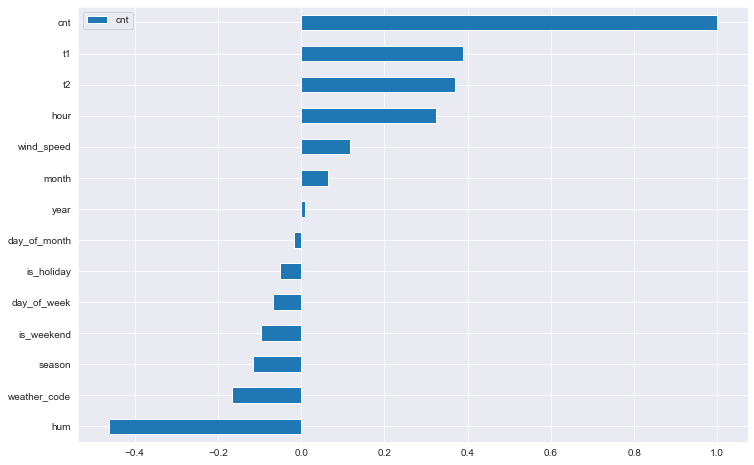

In [33]:
#with pandas
df.corr().sort_values(by="cnt").loc[:,["cnt"]].plot.barh(stacked=True)
plt.show(block=True)

### 9.Plot bike shares over time use lineplot

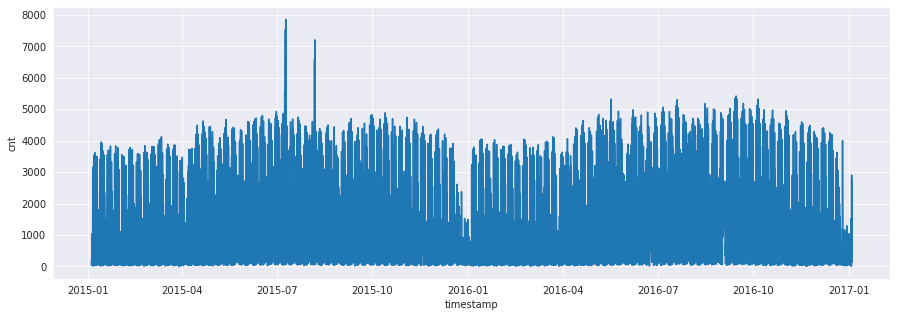

In [ ]:
sns.lineplot(x="year_month",y="cnt",data=df)

In [19]:
df

,cnt,t1,t2,hum,wind_speed,weather_code,is_holiday,is_weekend,season,year,month,day_of_month,day_of_week,hour,year_month
timestamp,,,,,,,,,,,,,,,
2015-01-04 00:00:00,182,3.0,2.0,93.0,6.0,3.0,0.0,1.0,3.0,2015,1,4,6,0,2015-01
2015-01-04 01:00:00,138,3.0,2.5,93.0,5.0,1.0,0.0,1.0,3.0,2015,1,4,6,1,2015-01
2015-01-04 02:00:00,134,2.5,2.5,96.5,0.0,1.0,0.0,1.0,3.0,2015,1,4,6,2,2015-01
2015-01-04 03:00:00,72,2.0,2.0,100.0,0.0,1.0,0.0,1.0,3.0,2015,1,4,6,3,2015-01
2015-01-04 04:00:00,47,2.0,0.0,93.0,6.5,1.0,0.0,1.0,3.0,2015,1,4,6,4,2015-01
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2017-01-03 19:00:00,1042,5.0,1.0,81.0,19.0,3.0,0.0,0.0,3.0,2017,1,3,1,19,2017-01
2017-01-03 20:00:00,541,5.0,1.0,81.0,21.0,4.0,0.0,0.0,3.0,2017,1,3,1,20,2017-01
2017-01-03 21:00:00,337,5.5,1.5,78.5,24.0,4.0,0.0,0.0,3.0,2017,1,3,1,21,2017-01


### 10.Plot bike shares by months and year_of_month (use lineplot, pointplot, barplot)

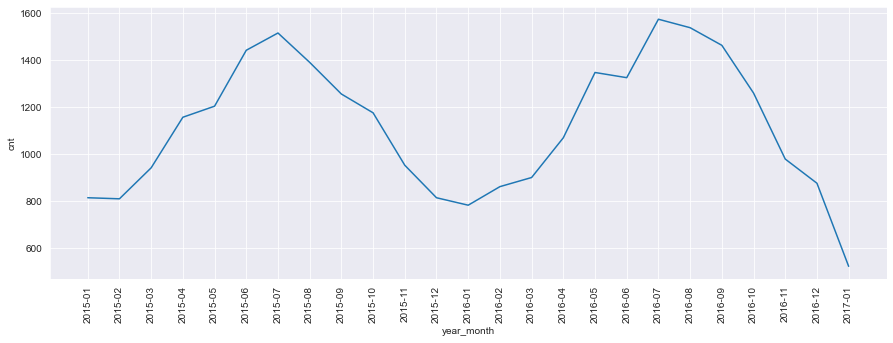

In [39]:
# with lineplot
plt.figure(figsize=(15,5))
sns.lineplot(x="year_month",y="cnt",data=df,ci=None)
plt.xticks(rotation=90);

<AxesSubplot:xlabel='month', ylabel='cnt'>

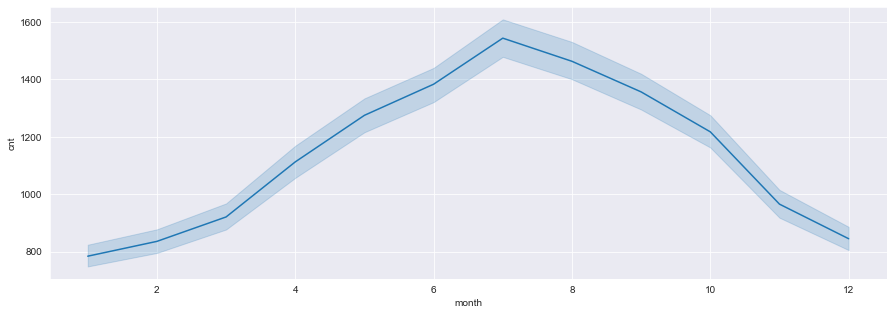

In [36]:
# with lineplot
plt.figure(figsize=(15,5))
sns.lineplot(x="month",y="cnt",data=df)

<AxesSubplot:xlabel='month', ylabel='cnt'>

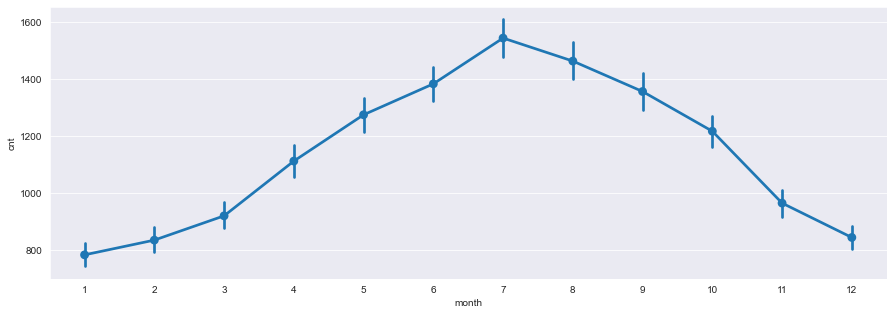

In [32]:
# with pointplot
plt.figure(figsize=(15,5))
sns.pointplot(x="month",y="cnt",data=df)

<AxesSubplot:xlabel='month', ylabel='cnt'>

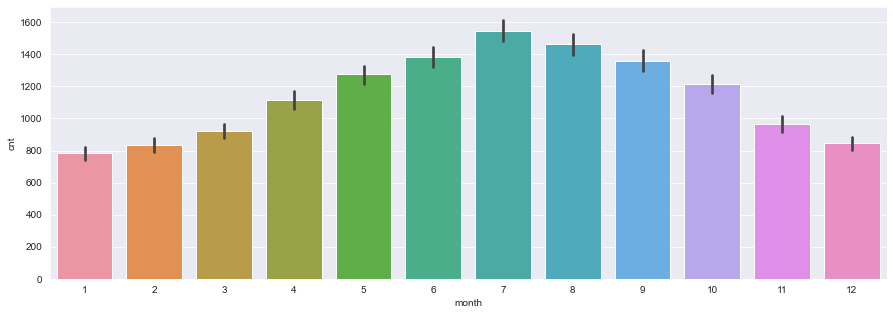

In [41]:
# with barplot
plt.figure(figsize=(15,5))
sns.barplot(x="month",y="cnt",data=df)

### 11.Plot bike shares by hours on (holidays, weekend, season)

<AxesSubplot:xlabel='hour', ylabel='cnt'>

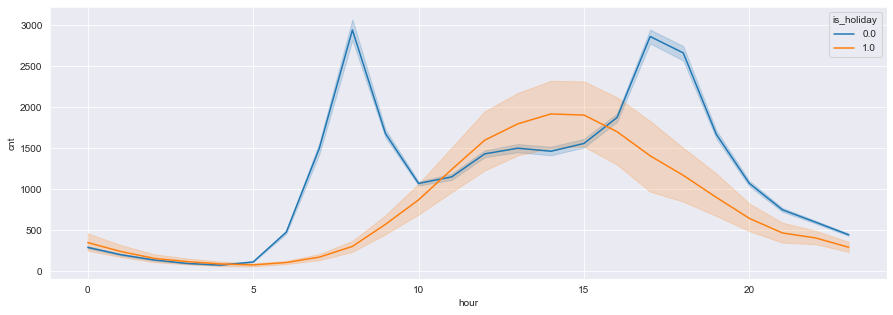

In [42]:
# with lineplot (*whether it is a holiday or not*)
plt.figure(figsize=(15,5))
sns.lineplot(x="hour",y="cnt",data=df,hue="is_holiday")

<AxesSubplot:xlabel='hour', ylabel='cnt'>

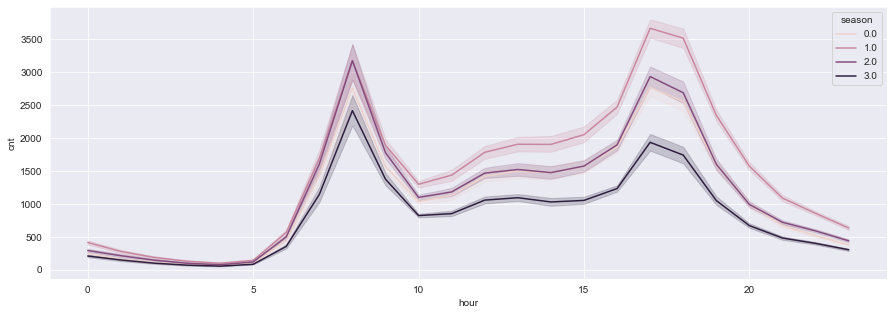

In [43]:
# with lineplot (*You may want to see seasonal breakdowns*)
plt.figure(figsize=(15,5))
sns.lineplot(x="hour",y="cnt",data=df,hue="season")

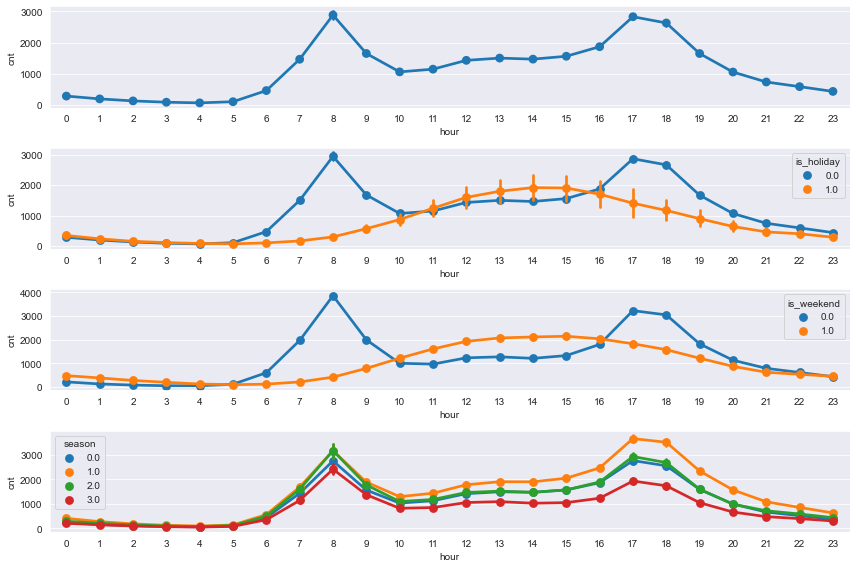

In [53]:
# with pointplot
plt.subplot(4, 1, 1)
sns.pointplot(x="hour",y="cnt",data=df)
plt.subplot(4, 1, 2)
sns.pointplot(x="hour",y="cnt",data=df,hue="is_holiday")
plt.subplot(4, 1, 3)
sns.pointplot(x="hour",y="cnt",data=df,hue="is_weekend")
plt.subplot(4, 1, 4)
sns.pointplot(x="hour",y="cnt",data=df,hue="season")
plt.tight_layout()
plt.show()

### 12.Plot bike shares by day of week
- You may want to see whether it is a holiday or not

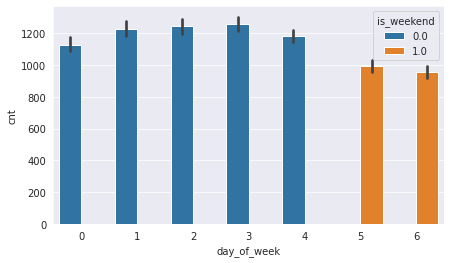

In [ ]:
# with barplot
sns.barplot(x="day_of_week",y="cnt",data=df,hue="is_weekend")

<AxesSubplot:xlabel='day_of_week', ylabel='cnt'>

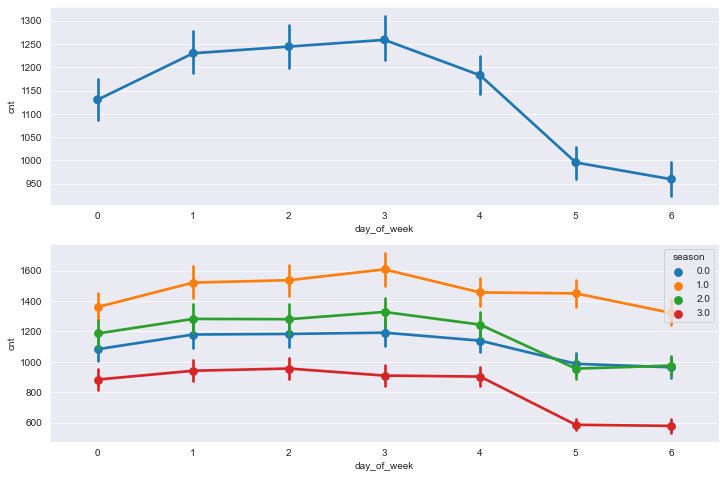

In [58]:
# with pointplot
plt.subplot(2, 1, 1)
sns.pointplot(x="day_of_week",y="cnt",data=df)
plt.subplot(2, 1, 2)
sns.pointplot(x="day_of_week",y="cnt",data=df,hue="season")

### 13.Plot bike shares by day of month

In [74]:
df.groupby("day_of_month")[["cnt"]].mean().astype(int).T

day_of_month,1,2,3,4,5,6,7,8,9,10,...,22,23,24,25,26,27,28,29,30,31
cnt,1077,1088,1127,1144,1140,1211,1194,1222,1261,1157,...,1127,1173,1054,1190,1081,1130,1062,1079,1156,968


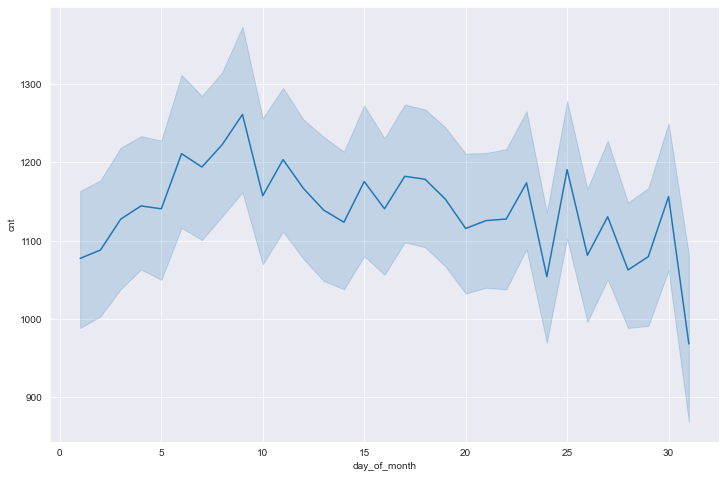

In [73]:
#with lineplot
sns.lineplot(x="day_of_month",y="cnt",data=df);

### 14.Plot bike shares by year
### Plot bike shares on holidays by seasons

<AxesSubplot:xlabel='year', ylabel='cnt'>

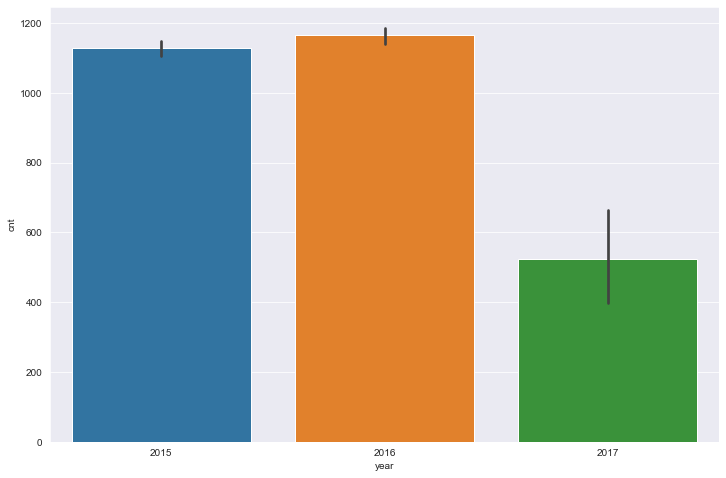

In [76]:
# with barplot
sns.barplot(x="year",y="cnt",data=df)

<AxesSubplot:xlabel='season', ylabel='cnt'>

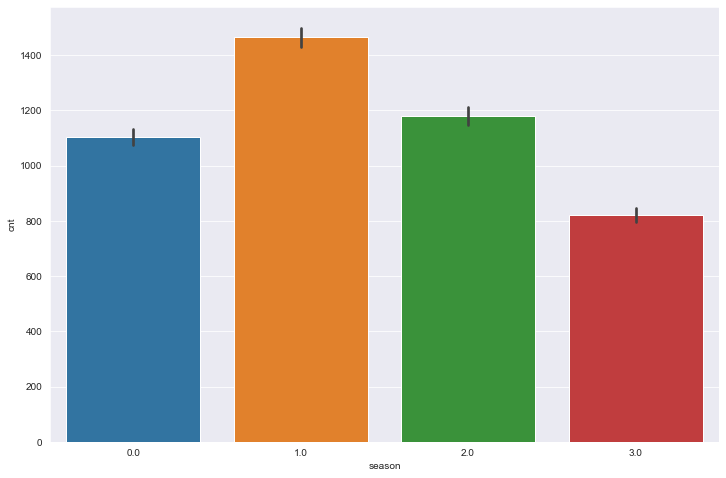

In [77]:
# with barplot
sns.barplot(x="season",y="cnt",data=df)

### 15.Visualize the distribution of bike shares by weekday/weekend with piechart and barplot

In [17]:
df["is_weekend"].value_counts()

0.0    12444
1.0     4970
Name: is_weekend, dtype: int64

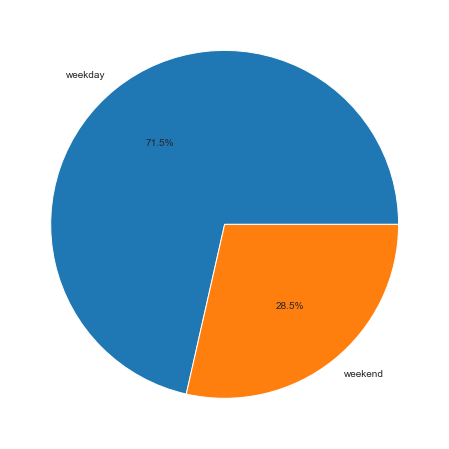

In [42]:
# pie chart
plt.pie(df["is_weekend"].value_counts(),labels=("weekday","weekend"), autopct="%.1f%%");

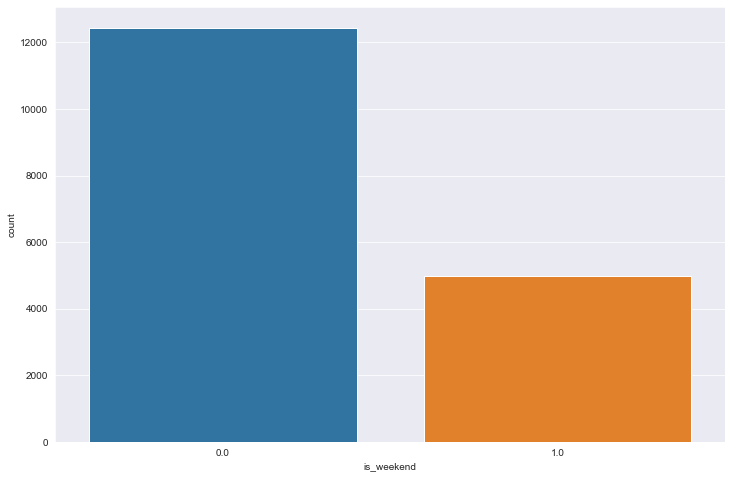

In [82]:
# with countplot

sns.countplot(x="is_weekend",data=df);

### 16.Plot the distribution of weather code by seasons

<AxesSubplot:xlabel='weather_code', ylabel='count'>

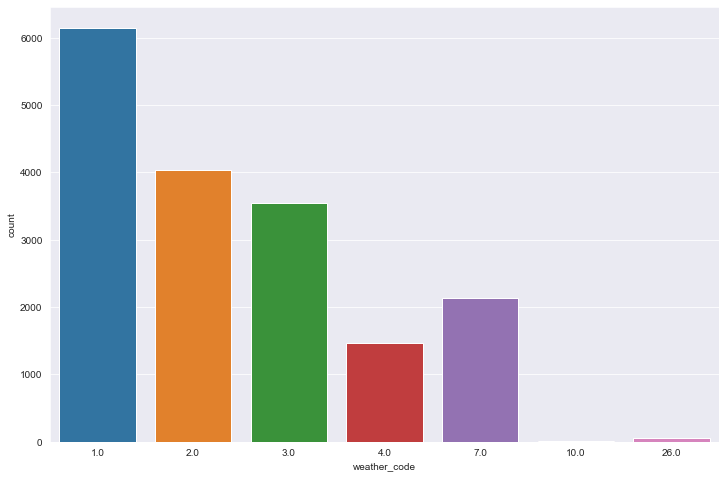

In [43]:
# with countplot
sns.countplot(x="weather_code",data=df)

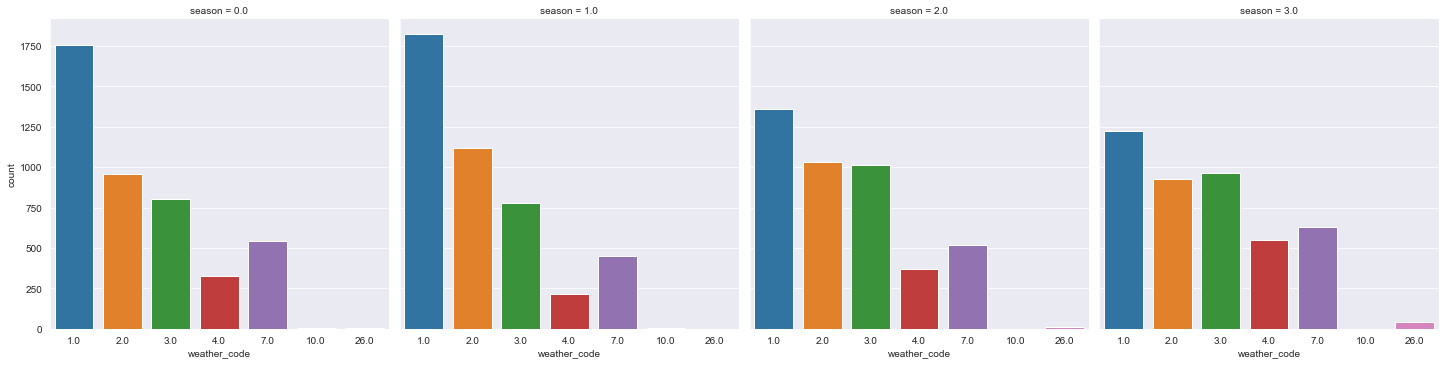

In [50]:
# with catplot
sns.catplot(x="weather_code",data=df,kind="count",col="season")